In [1]:
import geopandas as gpd
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 8)

training_folder = r'../'
gis_folder = training_folder +r'gis/corse/'
data_folder = training_folder +r'data/corse/'

# chargement des données

In [2]:
communes = gpd.read_file(gis_folder + r'communes_corse.shp')

In [3]:
commune_nearest_node = pd.read_csv(data_folder + 'commune_nearest_node.csv').astype(str)
stop_nearest_node = pd.read_csv(data_folder + 'stop_nearest_node.csv').astype(str)

In [4]:
node_node = pd.read_csv(data_folder+'node_node_graph_distance.csv', )
node_node[['commune_node', 'stop_node']] = node_node[['commune_node', 'stop_node']].astype(str)

# jointures 
## commune-node | node-node | node-gare  = commune-gare

In [5]:
merged = pd.merge(commune_nearest_node, node_node, on='commune_node') 

In [6]:
total = pd.merge(merged, stop_nearest_node, on='stop_node')

In [7]:
min_distance = total.groupby('commune', as_index=False)['distance'].min()

In [8]:
min_distance.head()

,commune,distance
0,2A001,4138.500
1,2A004,4864.260
2,2A006,6534.568
3,2A008,14729.507
4,2A011,52753.906


In [9]:
min_distance['distance'] = min_distance['distance'].astype(float)

In [10]:
communes_with_distance = pd.merge(communes, min_distance, left_on='insee', right_on='commune')

# Représentation

In [11]:
communes_with_distance.to_file(gis_folder + r'accessibility.shp')

C:\Users\rgoix\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


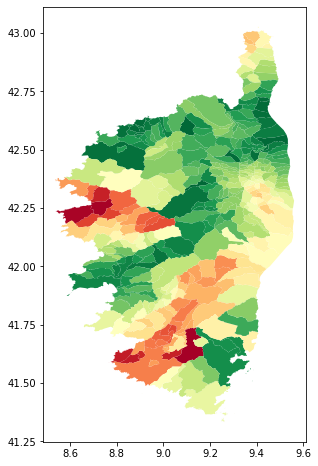

In [12]:
communes_with_distance.plot(column='distance', k=100, cmap='RdYlGn_r')
plt.savefig(r'../plot/commune_distance.png', bbox_inches='tight')